In [1]:
from datetime import datetime
from noteLib import *

date_range = (
        datetime(2009,1,1),
        # datetime(2017,1,1),
        datetime(2018,9,30))

clear_list = dc_find_datasets(date_range=date_range, product='landsat_7_USARD')


#measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'pixel_qa']

measurements = ['pixel_qa']



h=3
v=3
ch=20
cv=20

dc_xarray = dc_load_tile_chip(h,v,ch,cv,datasets=clear_list,measurements=measurements)

dc_xarray

from noteLib import plot_labeled_rgb
ntime = len(dc_xarray.time)

Failed to resolve driver datacube.plugins.index::s3aio_index
Failed to resolve driver datacube.plugins.io.read::s3aio_test
Failed to resolve driver datacube.plugins.io.read::s3aio
Exception during driver init, driver name: datacube.plugins.io.read::failing_end_point_throw
Driver init returned None, driver name: datacube.plugins.io.read::failing_end_point_none
Failed to resolve driver datacube.plugins.io.read::bad_end_point


Number of Pretty Scenes 36
TONY load output_crs=output_crs, =  epsg:5072
TONY output_geobox crs =  epsg:5072
TONY geopolygon crs =  epsg:5072
TONY geopolygon stuff =  epsg:5072 | 30.00, 0.00,-2055600.00|
| 0.00,-30.00, 2804820.00|
| 0.00, 0.00, 1.00| 100 100
TONY GeoBox extent =  Geometry({'coordinates': [[(-2055600.0, 2804820.0), (-2055600.0, 2801820.0), (-2052600.0, 2801820.0), (-2052600.0, 2804820.0), (-2055600.0, 2804820.0)]], 'type': 'Polygon'}, CRS('epsg:5072'))
TONY load type geobox =  <class 'datacube.utils.geometry.GeoBox'>
TONY load geobox =  GeoBox(Geometry({'coordinates': [[(-122.69588084993404, 45.6157235162929), (-122.6852253639486, 45.589781622875364), (-122.64829118916813, 45.59725867239482), (-122.65893350901386, 45.62320397917913), (-122.69588084993404, 45.6157235162929)]], 'type': 'Polygon'}, CRS('EPSG:4326')))
TONY load geobox.extent =  Geometry({'coordinates': [[(-2055600.0, 2804820.0), (-2055600.0, 2801820.0), (-2052600.0, 2801820.0), (-2052600.0, 2804820.0), (-20

TONY storage RasterDatasetDataSource src  <open DatasetReader name='s3://ga-odc-eros-ard-west/usard/LE07/20090529/LE07_CU_003003_20090529_20170713_C01_V01_PIXELQA.tif' mode='r'>
TONY (driver/readers.py) band_name pixel_qa
TONY storage RasterDatasetDataSource src  <open DatasetReader name='s3://ga-odc-eros-ard-west/usard/LE07/20090630/LE07_CU_003003_20090630_20170713_C01_V01_PIXELQA.tif' mode='r'>
TONY (driver/readers.py) band_name pixel_qa
TONY storage RasterDatasetDataSource src  <open DatasetReader name='s3://ga-odc-eros-ard-west/usard/LE07/20090716/LE07_CU_003003_20090716_20170713_C01_V01_PIXELQA.tif' mode='r'>
TONY (driver/readers.py) band_name pixel_qa
TONY storage RasterDatasetDataSource src  <open DatasetReader name='s3://ga-odc-eros-ard-west/usard/LE07/20090817/LE07_CU_003003_20090817_20170713_C01_V01_PIXELQA.tif' mode='r'>
TONY (driver/readers.py) band_name pixel_qa
TONY storage RasterDatasetDataSource src  <open DatasetReader name='s3://ga-odc-eros-ard-west/usard/LE07/2009090

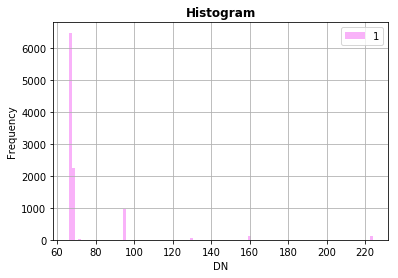

In [2]:
from rasterio.plot import show_hist
show_hist(dc_xarray['pixel_qa'][0].values, bins=100, lw=0.0, fc='#ee00ee',stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

In [3]:
dc_xarray.dims

Frozen(SortedKeysDict({'time': 36, 'x': 100, 'y': 100}))

In [4]:
ntim = len(dc_xarray.time)
ntim

36

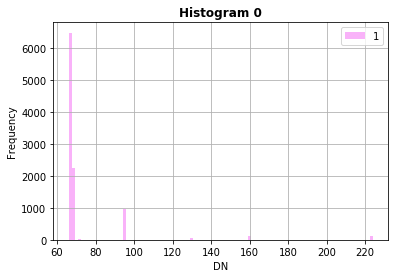

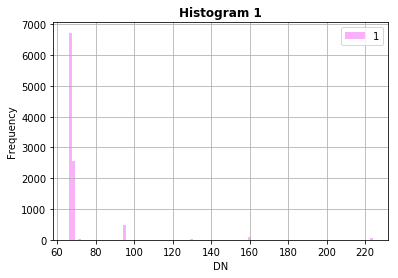

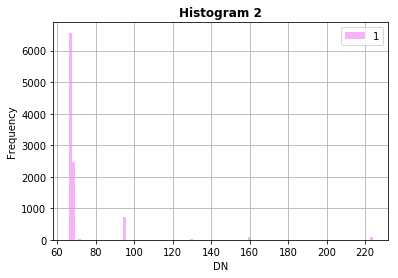

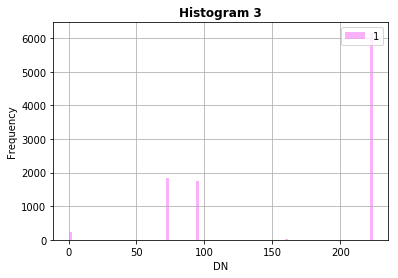

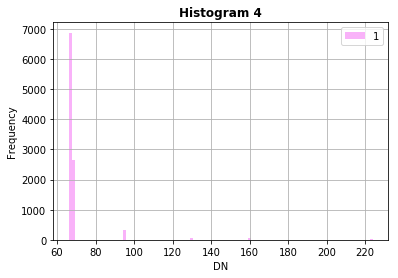

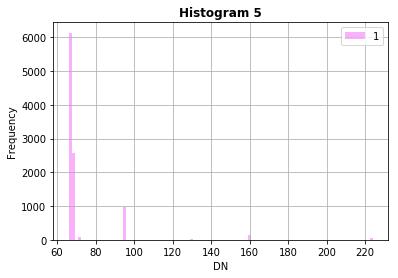

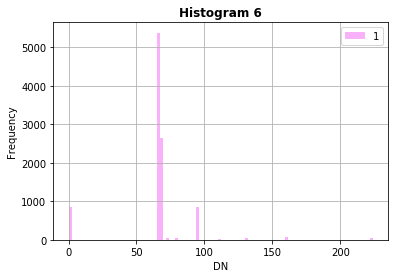

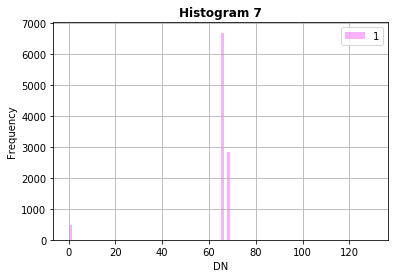

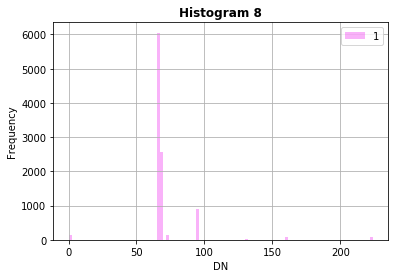

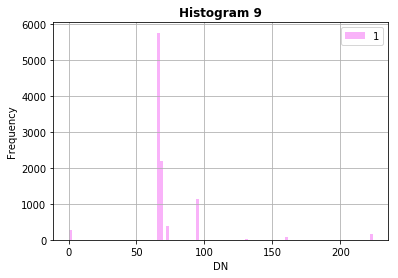

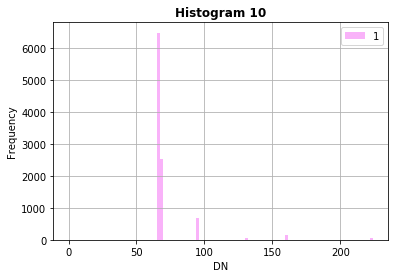

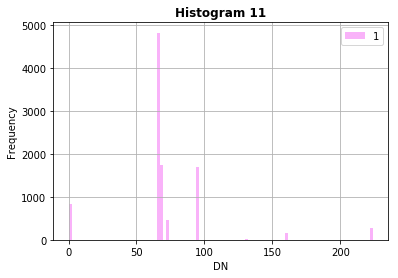

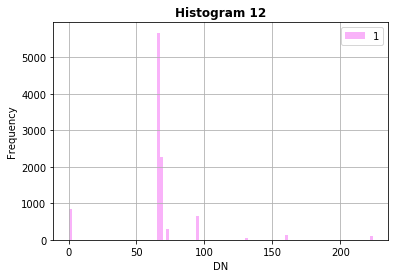

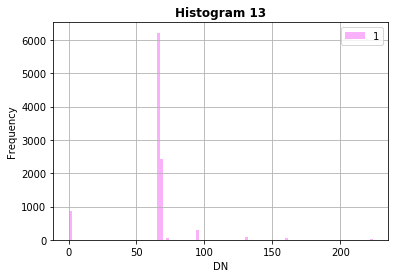

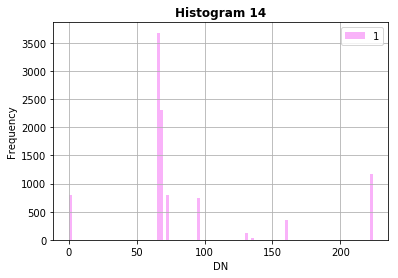

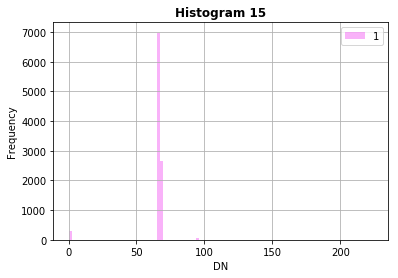

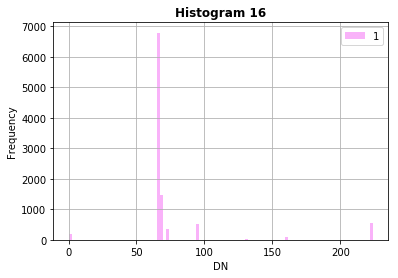

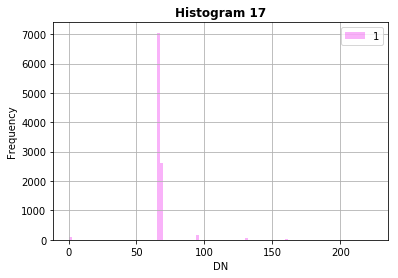

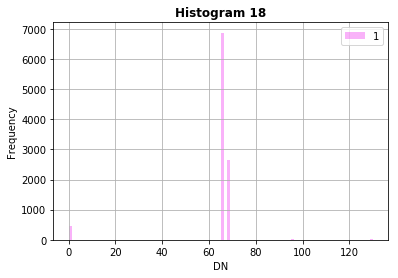

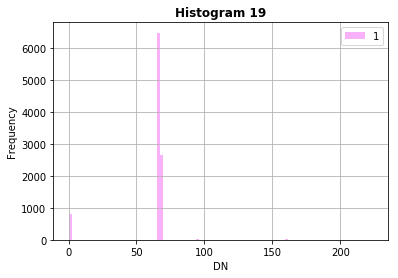

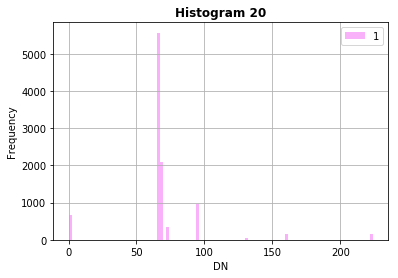

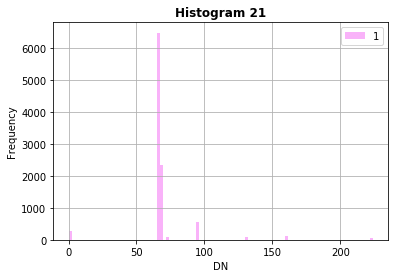

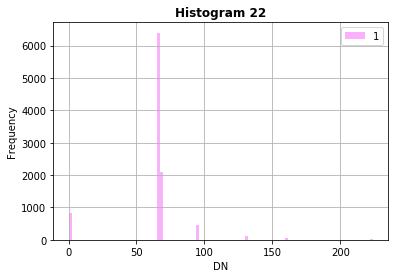

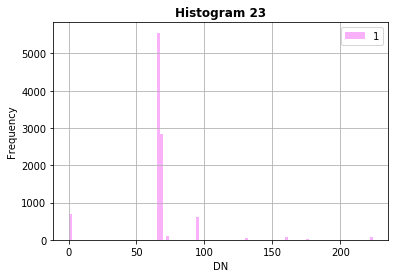

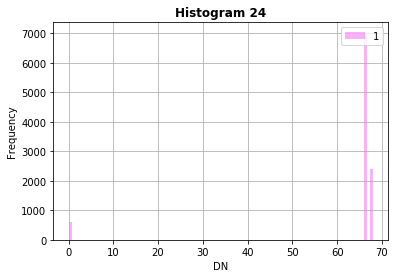

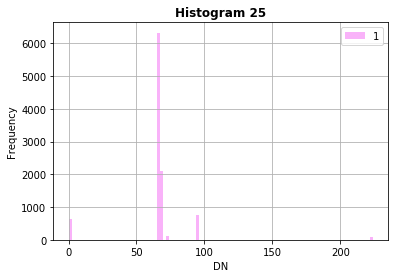

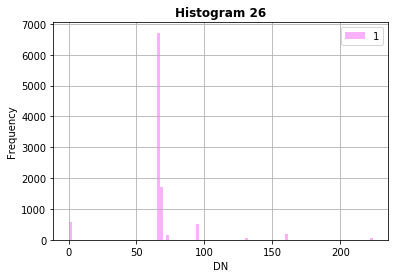

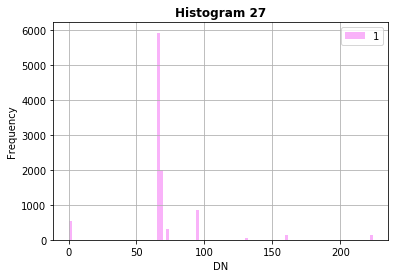

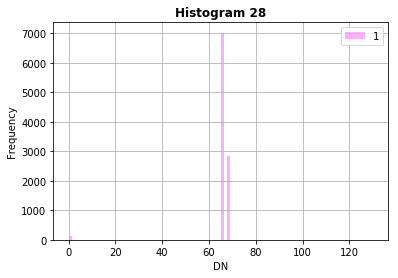

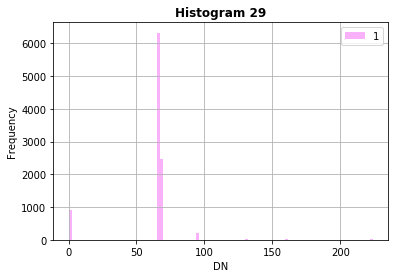

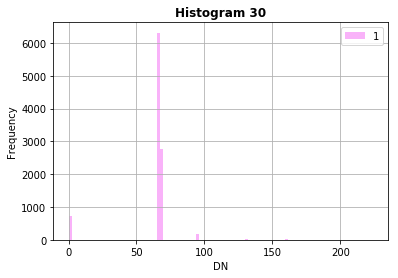

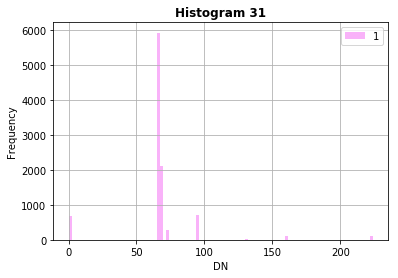

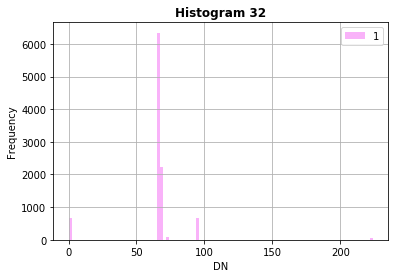

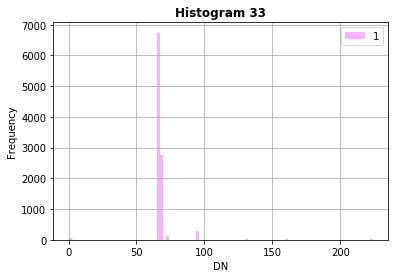

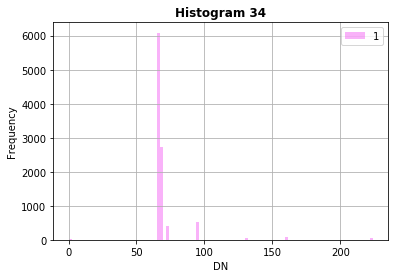

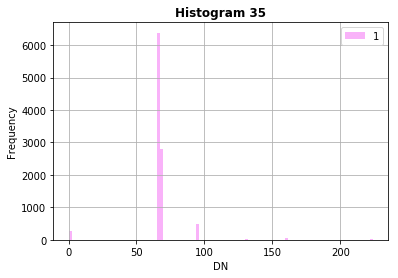

In [6]:
for i in range(0,ntim):
    tit = "Histogram %d" % i
    show_hist(dc_xarray['pixel_qa'][i].values, bins=100, lw=0.0, fc='#ee00ee',stacked=False, alpha=0.3, histtype='stepfilled', title=tit)

In [7]:
qa_cnt = {}
ary = dc_xarray['pixel_qa'][6].values
for x in range(0,100):
    for y in range (0,100):
        if ary[x,y] in qa_cnt.keys():
            qa_cnt[ary[x,y]] = qa_cnt[ary[x,y]] + 1
        else:
            qa_cnt[ary[x,y]] = 1
    print
    
for i in sorted(qa_cnt):
    print(i, qa_cnt[i])

0 863
66 5375
68 2644
72 38
80 57
96 848
112 23
130 27
132 7
136 2
160 75
176 1
224 40


In [8]:
dc_xarray.time[6]

<xarray.DataArray 'time' ()>
array('2009-12-07T18:46:54.841873000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2009-12-07T18:46:54.841873
Attributes:
    units:    seconds since 1970-01-01 00:00:00

In [9]:
!gdalinfo /vsis3/ga-odc-eros-ard-west/usard/LE07/20091207/LE07_CU_003003_20091207_20170713_C01_V01_PIXELQA.tif


Driver: GTiff/GeoTIFF
Files: /vsis3/ga-odc-eros-ard-west/usard/LE07/20091207/LE07_CU_003003_20091207_20170713_C01_V01_PIXELQA.tif
Size is 5000, 5000
Coordinate System is:
PROJCS["Albers",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378140,298.2569999999957,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Albers_Conic_Equal_Area"],
    PARAMETER["standard_parallel_1",29.5],
    PARAMETER["standard_parallel_2",45.5],
    PARAMETER["latitude_of_center",23],
    PARAMETER["longitude_of_center",-96],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]]]
Origin = (-2115585.000000000000000,2864805.000000000000000)
Pixel Size = (30.000000000000000,-30.000000000000000)
Metadata:
  AREA_OR_POINT=Area
  Band_1=level-2 pixel quality band
I

In [10]:
!gdalinfo -hist /vsis3/ga-odc-eros-ard-west/usard/LE07/20091207/LE07_CU_003003_20091207_20170713_C01_V01_PIXELQA.tif

Driver: GTiff/GeoTIFF
Files: /vsis3/ga-odc-eros-ard-west/usard/LE07/20091207/LE07_CU_003003_20091207_20170713_C01_V01_PIXELQA.tif
Size is 5000, 5000
Coordinate System is:
PROJCS["Albers",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378140,298.2569999999957,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Albers_Conic_Equal_Area"],
    PARAMETER["standard_parallel_1",29.5],
    PARAMETER["standard_parallel_2",45.5],
    PARAMETER["latitude_of_center",23],
    PARAMETER["longitude_of_center",-96],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]]]
Origin = (-2115585.000000000000000,2864805.000000000000000)
Pixel Size = (30.000000000000000,-30.000000000000000)
Metadata:
  AREA_OR_POINT=Area
  Band_1=level-2 pixel quality band
I